In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Data Preparation

In [2]:
# Load data
movie_data = pd.read_csv("/Coding/Python/ML2/GroupProject/dataset/movie.csv")
rating_data = pd.read_csv("/Coding/Python/ML2/GroupProject/dataset/rating.csv")

In [3]:
print('The ratings dataset has', rating_data['userId'].nunique(), 'unique users')
print('The ratings dataset has', rating_data['movieId'].nunique(), 'unique movies')
print('The ratings dataset has', rating_data['rating'].nunique(), 'unique ratings')
print('The unique ratings are', sorted(rating_data['rating'].unique()))

The ratings dataset has 138493 unique users
The ratings dataset has 26744 unique movies
The ratings dataset has 10 unique ratings
The unique ratings are [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


In [4]:
# Merge movie data with rating data
data = movie_data.merge(rating_data,how="left",on="movieId")

In [5]:
data.head(5)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6.0,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10.0,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,4.5,2009-01-02 01:13:41


# Data analysis

In this part , we will group the movie by title to count the number of rating in each movie.

And then , we will remove the movie that have < 1000 ratings to filter common movies for users.

We also calculating the average rating in each movie

In [6]:
# Group movie by title, count the total number and the average ratings in each movie
ratings = data.groupby('title').agg(mean_rating=('rating','mean'), number_of_ratings = ('rating','count')).reset_index()

In [7]:
# Keep the movies > 500 ratings
ratings_500 = ratings[ratings['number_of_ratings']>1000]

In [8]:
# Top 5 movie have the lowest number of ratings
ratings_500.sort_values(by='number_of_ratings',ascending=True).head()

,title,mean_rating,number_of_ratings
14189,"Lincoln Lawyer, The (2011)",3.718781,1001
26880,Wristcutters: A Love Story (2006),3.872627,1001
20619,Scanners (1981),3.241276,1003
19833,Return to Paradise (1998),3.540877,1003
18383,Pet Sematary II (1992),2.116650,1003


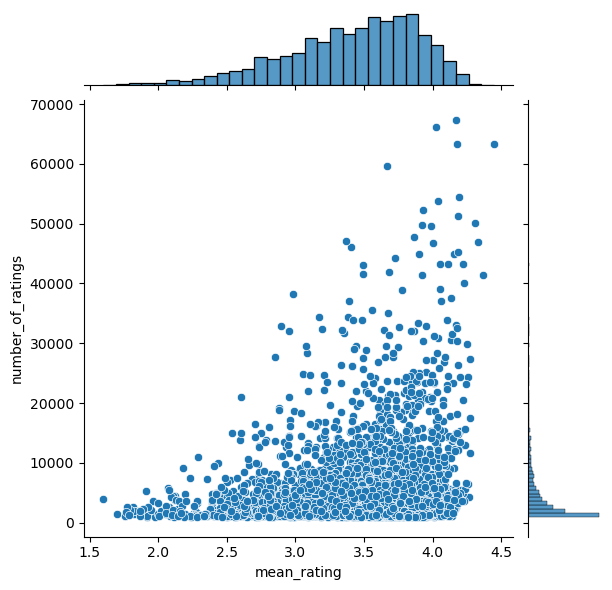

In [9]:
# Plot the average rating and the number of ratings for each movie
sns.jointplot(x='mean_rating',y='number_of_ratings',data=ratings_500)

In [10]:
# Save the new data of movies have > 1000 ratings
data_500 = pd.merge(data,ratings_500[['title']], on='title',how='inner')

In [11]:
data_500.head(10)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6.0,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10.0,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,4.5,2009-01-02 01:13:41
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,12.0,4.0,1997-03-22 20:48:38
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13.0,4.0,1996-11-27 08:21:31
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14.0,4.5,2008-10-29 20:13:59
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,16.0,3.0,2001-05-27 13:22:52
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19.0,5.0,1997-02-05 21:03:48


In [12]:
print('The ratings dataset has', data_500['userId'].nunique(), 'unique users')
print('The ratings dataset has', data_500['movieId'].nunique(), 'unique movies')
print('The ratings dataset has', data_500['rating'].nunique(), 'unique ratings')
print('The unique ratings are', sorted(data_500['rating'].unique()))

The ratings dataset has 138493 unique users
The ratings dataset has 3163 unique movies
The ratings dataset has 10 unique ratings
The unique ratings are [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


# Create user-movie matrix

We will transform the dataset to the matrix.

Row : movies

Columns : users

Values : Rating, NaN(if no rating)

In [13]:
# Transform to matrix using pivot_table
matrix = data_500.pivot_table(index='title',columns='userId',values='rating')

In [14]:
matrix.head(10)

userId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,138484.0,138485.0,138486.0,138487.0,138488.0,138489.0,138490.0,138491.0,138492.0,138493.0
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(500) Days of Summer (2009),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
*batteries not included (1987),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...And Justice for All (1979),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10 Things I Hate About You (1999),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"10,000 BC (2008)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
101 Dalmatians (One Hundred and One Dalmatians) (1961),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,3.5
102 Dalmatians (2000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For better result for the model , we will normalize the data.

We will calculate the mean rating of each user and then subtracting the average rating of each movie

So that, the movie have the rating > the mean raing will have positive value, the others will be negative

In [15]:
# Normalize matrix
matrix_normalize = matrix.subtract(matrix.mean(axis=1),axis=0)

In [16]:
matrix_normalize.head(10)

userId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,138484.0,138485.0,138486.0,138487.0,138488.0,138489.0,138490.0,138491.0,138492.0,138493.0
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(500) Days of Summer (2009),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
*batteries not included (1987),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...And Justice for All (1979),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10 Things I Hate About You (1999),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"10,000 BC (2008)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.078429
101 Dalmatians (One Hundred and One Dalmatians) (1961),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.932618,NaN,0.067382
102 Dalmatians (2000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Calculate Similarity Score

We will find the similarity between each movie.



In [17]:
from sklearn.metrics.pairwise import cosine_similarity
# using Pearson correlation
item_similarity = matrix_normalize.T.corr()

In [18]:
item_similarity.head(5)

title,"'burbs, The (1989)",(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),102 Dalmatians (2000),12 Angry Men (1957),...,Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zulu (1964),[REC] (2007),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",1.000000,0.097882,0.319845,0.145131,0.151615,0.034125,0.180405,0.097390,0.045606,0.076255,...,0.126178,0.073346,0.128325,0.189406,0.176504,0.183346,0.292113,0.177478,0.124554,0.331483
(500) Days of Summer (2009),0.097882,1.000000,0.118405,0.092225,0.235062,0.009131,0.101521,0.081279,0.071588,0.130494,...,0.191091,0.337538,0.174309,0.244908,0.140788,0.288171,0.189644,0.094744,0.015052,0.103751
*batteries not included (1987),0.319845,0.118405,1.000000,0.270269,0.285539,0.217406,0.333131,0.294320,0.387152,0.097413,...,0.249999,0.319760,0.129328,0.222584,0.095947,0.114041,0.247301,0.171188,0.291160,0.258929
...And Justice for All (1979),0.145131,0.092225,0.270269,1.000000,0.226675,0.119303,0.222339,0.296409,0.303394,0.260757,...,-0.108689,0.217741,0.225549,0.223111,0.095802,0.246469,0.538161,0.203773,0.126483,0.186710
10 Things I Hate About You (1999),0.151615,0.235062,0.285539,0.226675,1.000000,0.250397,0.356027,0.289510,0.399271,0.028113,...,0.181049,0.224701,0.131054,0.227335,0.154788,0.176071,0.156319,0.122691,0.351800,0.218709


The similarity is a values range from -1 to 1 . From the oposite movie similarity to the high movie similarity

# Predict user's rating for a movie

We will create a list of movie that the user has watched and rated

For example , we choose user 2 and the movie 'Til There Was You (1997)' 

Then, we will compare the similarity between the list of movie that user 1 watched and the movie we choose



In [19]:
picked_userid = 5
picked_movie = "101 Dalmatians (One Hundred and One Dalmatians) (1961)"

In [20]:
# Creare list of movie that picked user watch . Sort by rating descending
picked_userid_watched = pd.DataFrame(matrix_normalize[picked_userid].dropna(axis=0,how='all')\
                                                            .sort_values(ascending=False))\
                                                            .reset_index()\
                                                            .rename(columns={5:'rating'})

picked_userid_watched.head()

,title,rating
0,Twister (1996),1.803751
1,Independence Day (a.k.a. ID4) (1996),1.629038
2,Mrs. Doubtfire (1993),1.613733
3,Maverick (1994),1.589263
4,Ransom (1996),1.542065


In [25]:
# create a dataFrame of the similarity score between the picked movie with others movie
picked_movie_similarity_score = item_similarity[[picked_movie]].reset_index().rename(columns={"101 Dalmatians (One Hundred and One Dalmatians) (1961)":"similarity_score"})

n = 10

# merge with the list of movie that user watch by title
picked_userid_watched_similarity = pd.merge(left=picked_userid_watched,
                                            right=picked_movie_similarity_score,
                                            on='title',
                                            how='inner')\
                                            .sort_values('similarity_score',ascending=False)[:10]

print("Top movies similarity to the picked movie : ")
picked_userid_watched_similarity

Top movies similarity to the picked movie : 


,title,rating,similarity_score
11,Snow White and the Seven Dwarfs (1937),1.389508,0.564089
14,Beauty and the Beast (1991),1.326698,0.507063
19,Mary Poppins (1964),1.267594,0.484231
16,Aladdin (1992),1.319144,0.469933
21,"Lion King, The (1994)",1.220910,0.454322
47,All Dogs Go to Heaven 2 (1996),0.272686,0.405567
9,"Secret Garden, The (1993)",1.460920,0.387183
2,Mrs. Doubtfire (1993),1.613733,0.380528
22,"Sound of Music, The (1965)",1.195566,0.374226
20,E.T. the Extra-Terrestrial (1982),1.245082,0.366884


In [22]:
# predict the movie rating
predicted_rating = round(np.average(picked_userid_watched_similarity['rating'],
                                    weights=picked_userid_watched_similarity['similarity_score']),6)

print(f'The predicted rating for "{picked_movie}" by user {picked_userid} is {predicted_rating}')

The predicted rating for "101 Dalmatians (One Hundred and One Dalmatians) (1961)" by user 5 is 1.237919


# Recommend movie for a user based on their watched movie list

Steps:
1. Create a list of movie that the user has watched and not watched
2. Loop the unwatched movies to calculate the similarity score between unwatched movies.
   <br>Calculate the predicted ratings

The function will return the top recommended movies and their predicted ratings

In [23]:
# Item-based recommendation function
def item_based_rec(picked_userid, number_of_similar_items=5, number_of_recommendations=3):
    import operator
    # Movies that the target user has not watched
    picked_userid_unwatched = pd.DataFrame(matrix_normalize[picked_userid].isna()).reset_index()
    picked_userid_unwatched = picked_userid_unwatched[picked_userid_unwatched[picked_userid] == True]['title'].values.tolist()

    # Movies that the target user has watched
    picked_userid_watched = pd.DataFrame(matrix_normalize[picked_userid].dropna(axis=0, how='all') \
        .sort_values(ascending=False)) \
        .reset_index() \
        .rename(columns={picked_userid: 'rating'})

    # Dictionary to save the unwatched movie and predicted rating pair
    rating_prediction = {}

    # Loop through unwatched movies
    for picked_movie in picked_userid_unwatched:
        # Calculate the similarity score of the picked movie with other movies
        picked_movie_similarity_score = item_similarity[[picked_movie]].reset_index().rename(
            columns={picked_movie: 'similarity_score'})

        # Rank the similarities between the picked user watched movie and the picked unwatched movie.
        picked_userid_watched_similarity = pd.merge(left=picked_userid_watched,
                                                    right=picked_movie_similarity_score,
                                                    on='title',
                                                    how='inner') \
            .sort_values('similarity_score', ascending=False)[:number_of_similar_items]

        # Calculate the predicted rating using weighted average of similarity scores and the ratings from user 
        predicted_rating = round(np.average(picked_userid_watched_similarity['rating'],
                                            weights=picked_userid_watched_similarity['similarity_score']), 6)

        # Save the predicted rating in the dictionary
        rating_prediction[picked_movie] = predicted_rating

    # Return the top recommended movies
    return sorted(rating_prediction.items(), key=operator.itemgetter(1), reverse=True)[:number_of_recommendations]

In [24]:
#Get recommendations
recommended_movie = item_based_rec(picked_userid=5, number_of_similar_items=5, number_of_recommendations =3)
recommended_movie

[('Lethal Weapon 4 (1998)', 1.613917),
 ('Lethal Weapon 3 (1992)', 1.61321),
 ('Rock, The (1996)', 1.598838)]

In [28]:
import pandas as pd

# Your movie recommendations
recommended_movies = [('Lethal Weapon 4 (1998)', 1.613917),
                      ('Lethal Weapon 3 (1992)', 1.61321),
                      ('Rock, The (1996)', 1.598838)]

# Create a DataFrame
df = pd.DataFrame(recommended_movies, columns=["Movie Title", "Score"])

# Print the DataFrame
print(df)



              Movie Title     Score
0  Lethal Weapon 4 (1998)  1.613917
1  Lethal Weapon 3 (1992)  1.613210
2        Rock, The (1996)  1.598838
